In [2]:
import numpy as np
from casacore.tables import table

# Spécifie le chemin vers ton fichier MeasurementSet
ms_path = 'sim_small.ms'

# Ouvre la table principale
with table(ms_path) as ms:
    # Lis les visibilités (champ DATA ou CORRECTED_DATA selon ce que tu veux)
    visibilities = ms.getcol('DATA')  # shape: (n_polarizations, n_channels, n_rows)

    # Optionnel : afficher quelques infos
    print(f"Dimensions des visibilités : {visibilities.shape}")
    print("Exemple de visibilités pour la première ligne d'observation :")
    print(visibilities[:, :, 0])  # visibilités pour le 1er "row" (baseline, time)

# Si tu veux les temps, antennes ou autres :
with table(ms_path) as ms:
    times = ms.getcol('TIME')
    ant1 = ms.getcol('ANTENNA1')
    ant2 = ms.getcol('ANTENNA2')
    print(f"Temps de la première observation : {times[0]}")
    print(f"Baselines de la première ligne : {ant1[0]} - {ant2[0]}")


Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows
Dimensions des visibilités : (3924480, 1, 1)
Exemple de visibilités pour la première ligne d'observation :
[[0.9686658 +0.53020394j]
 [0.01692153+0.43607754j]
 [1.1270419 -0.01769333j]
 ...
 [0.25082132+1.3877846j ]
 [2.5165327 +1.0840937j ]
 [2.64768   -1.4427481j ]]
Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows
Temps de la première observation : 4453449949.863999
Baselines de la première ligne : 0 - 1


Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows
u shape: (3924480,)
v shape: (3924480,)
amp_mean shape: (1,)
data shape: (3924480, 1, 1)
amp shape: (1, 1)
Amplitude min: 1.1042778491973877, max: 1.1042778491973877
Amplitude min: 0.00020796764874830842, max: 3.3823189735412598


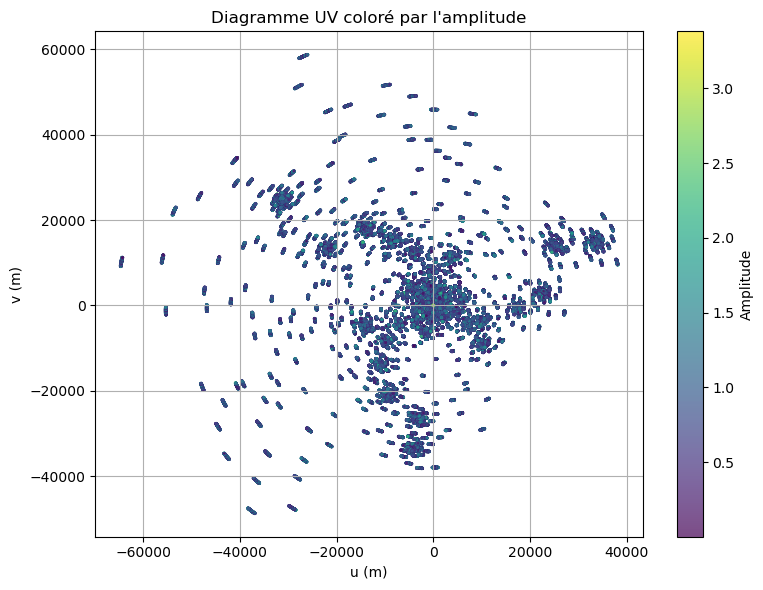

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from casacore.tables import table

# === Chemin vers le MS ===
ms_path = 'sim_small.ms'

# === Lecture de la table ===
with table(ms_path) as ms:
    data = ms.getcol('DATA')         # shape: (n_pol, n_chan, n_rows)
    uvw = ms.getcol('UVW')           # shape: (n_rows, 3)

# === Extraction u, v ===
u = uvw[:, 0]
v = uvw[:, 1]

# === Amplitude moyenne sur la polarisation 0 et en fréquence ===
amp = np.abs(data[0, :, :])          # shape: (n_chan, n_rows)
amp_mean = np.mean(amp, axis=0)      # shape: (n_rows,)
print(f"u shape: {u.shape}")
print(f"v shape: {v.shape}")
print(f"amp_mean shape: {amp_mean.shape}")
print(f"data shape: {data.shape}")
amp = np.abs(data[0, :, :])
print(f"amp shape: {amp.shape}")
print(f"Amplitude min: {amp_mean.min()}, max: {amp_mean.max()}")



amp = np.abs(data[:, 0, 0])  # amplitude complexe → shape (n_rows,)
amp_mean = amp               # pas besoin de moyenne si 1 canal/pola
print(f"Amplitude min: {amp_mean.min()}, max: {amp_mean.max()}")


assert u.shape == amp_mean.shape, "Mismatch entre u/v et amp"  # devrait passer maintenant

# === Affichage ===
plt.figure(figsize=(8, 6))
sc = plt.scatter(u, v, c=amp_mean, cmap='viridis', s=1, alpha=0.7)
plt.colorbar(sc, label='Amplitude')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.title("Diagramme UV coloré par l'amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()



Successful readonly open of default-locked table /home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS: 26 columns, 1477782 rows
u shape: (1477782,)
v shape: (1477782,)
amp_mean shape: (4,)
data shape: (1477782, 8, 4)
amp shape: (8, 4)
Amplitude min: 13788694.0, max: 365383872.0
Amplitude min: 10307.1083984375, max: 1439792256.0


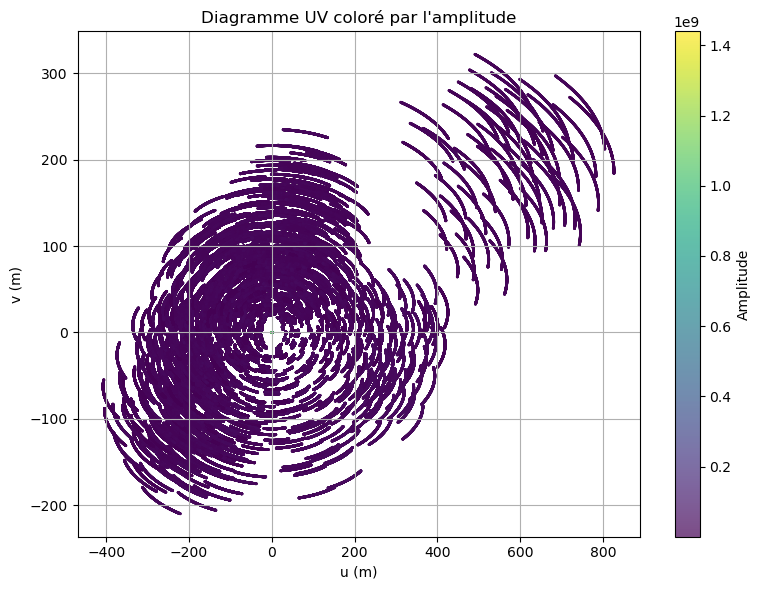

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from casacore.tables import table

# === Chemin vers le MS ===
ms_path = '/home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS'

# === Lecture de la table ===
with table(ms_path) as ms:
    data = ms.getcol('DATA')         # shape: (n_pol, n_chan, n_rows)
    uvw = ms.getcol('UVW')           # shape: (n_rows, 3)

# === Extraction u, v ===
u = uvw[:, 0]
v = uvw[:, 1]

# === Amplitude moyenne sur la polarisation 0 et en fréquence ===
amp = np.abs(data[0, :, :])          # shape: (n_chan, n_rows)
amp_mean = np.mean(amp, axis=0)      # shape: (n_rows,)
print(f"u shape: {u.shape}")
print(f"v shape: {v.shape}")
print(f"amp_mean shape: {amp_mean.shape}")
print(f"data shape: {data.shape}")
amp = np.abs(data[0, :, :])
print(f"amp shape: {amp.shape}")
print(f"Amplitude min: {amp_mean.min()}, max: {amp_mean.max()}")



amp = np.abs(data[:, 0, 0])  # amplitude complexe → shape (n_rows,)
amp_mean = amp               # pas besoin de moyenne si 1 canal/pola
print(f"Amplitude min: {amp_mean.min()}, max: {amp_mean.max()}")


assert u.shape == amp_mean.shape, "Mismatch entre u/v et amp"  # devrait passer maintenant

# === Affichage ===
plt.figure(figsize=(8, 6))
sc = plt.scatter(u, v, c=amp_mean, cmap='viridis', s=1, alpha=0.7)
plt.colorbar(sc, label='Amplitude')
plt.xlabel('u (m)')
plt.ylabel('v (m)')
plt.title("Diagramme UV coloré par l'amplitude")
plt.grid(True)
plt.tight_layout()
plt.show()



Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows
u shape: (3924480,), v shape: (3924480,), vis shape: (3924480,)
u_idx: (3924480,), v_idx: (3924480,), vis: (3924480,)
valid: (3924480,), valid.sum(): 3924480
u_idx après valid: (3924480,)
v_idx après valid: (3924480,)
vis après valid: (3924480,)


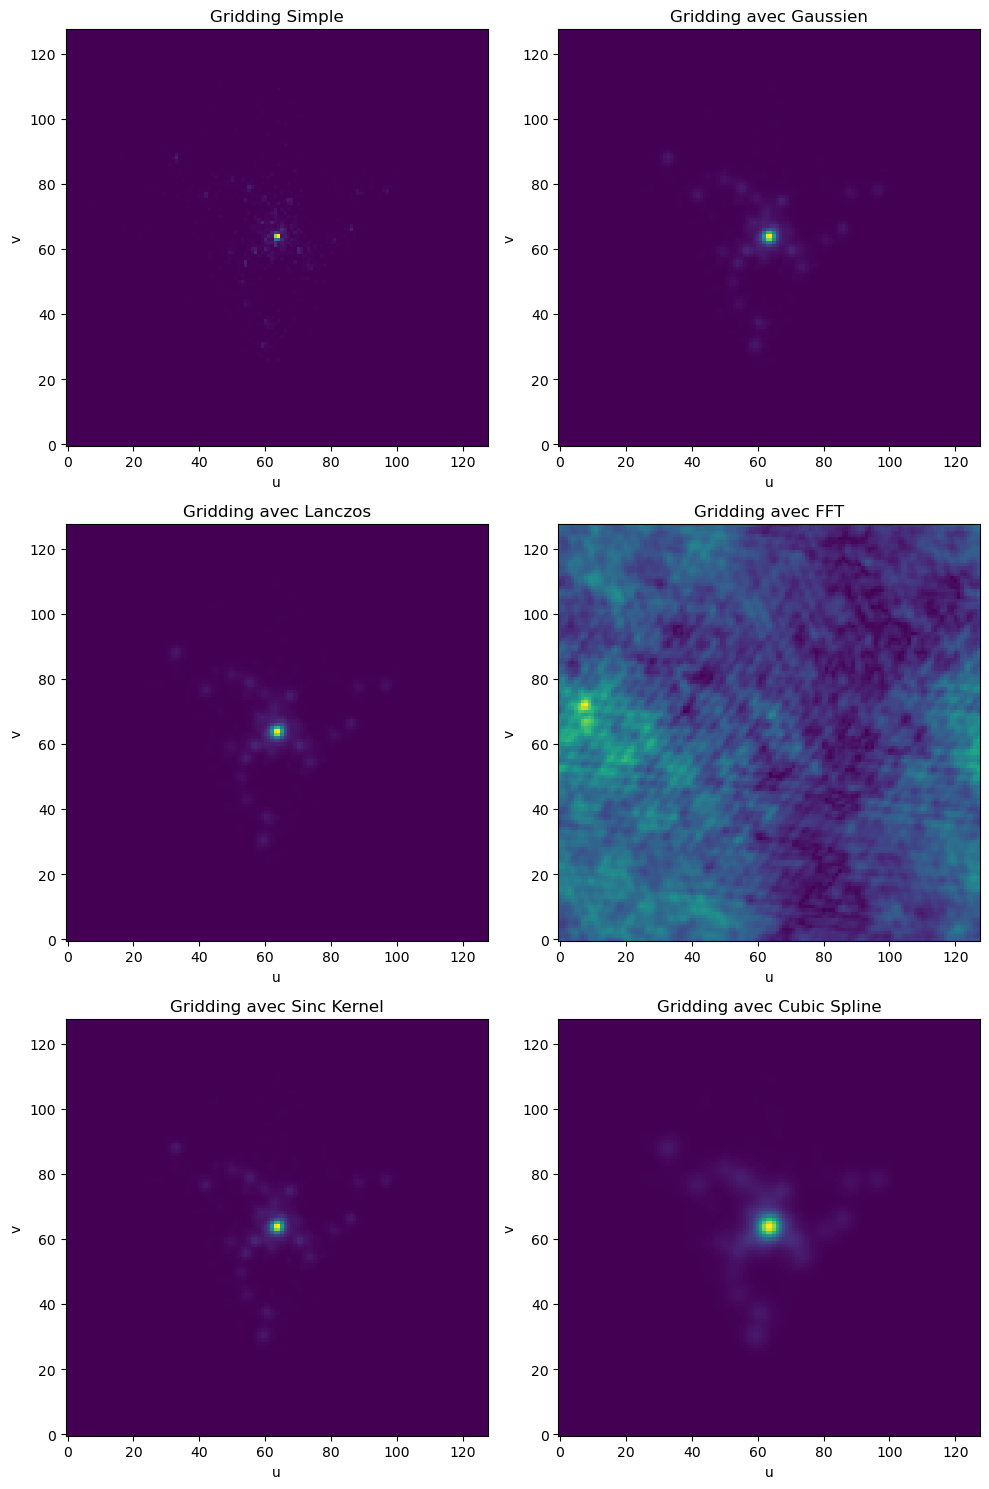

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from casacore.tables import table
from scipy.ndimage import gaussian_filter

# === Chargement du fichier MS ===
ms_path = 'sim_small.ms'
t = table(ms_path)
uvw = t.getcol('UVW')  # shape: (3, N)
data = t.getcol('DATA')  # shape: (N, 1, 1)
t.close()

# === Extraction des données ===
u = uvw[0, :]  # (n_rows,)
v = uvw[1, :]  # (n_rows,)
u = uvw[:, 0]
v = uvw[:, 1]
vis = data[:, 0, 0].flatten()  # Assurez-vous que vis est un tableau 1D
print(f"u shape: {u.shape}, v shape: {v.shape}, vis shape: {vis.shape}")

# === Paramètres de la grille ===
grid_size = 128  # Taille de la grille
uv_max = np.max(np.abs(np.concatenate([u, v])))  # Plage maximale des coordonnées UV
du = 2 * uv_max / grid_size  # Taille d’un pixel en uv

# === Calcul des indices ===
u_idx = ((u + uv_max) / du).astype(int)  # Conversion des coordonnées UV en indices de grille
v_idx = ((v + uv_max) / du).astype(int)

# === Vérification des dimensions ===
print(f"u_idx: {u_idx.shape}, v_idx: {v_idx.shape}, vis: {vis.shape}")

# === Filtrage des indices valides ===
valid = (u_idx >= 0) & (u_idx < grid_size) & (v_idx >= 0) & (v_idx < grid_size)
print(f"valid: {valid.shape}, valid.sum(): {valid.sum()}")

# === Sélection des données valides ===
u_idx = u_idx[valid]
v_idx = v_idx[valid]
vis = vis[:len(u_idx)]  # Limite vis à la taille de u_idx

# === Vérification ===
print(f"u_idx après valid: {u_idx.shape}")
print(f"v_idx après valid: {v_idx.shape}")
print(f"vis après valid: {vis.shape}")

# --- 1. Gridding simple (binning direct) ---
grid_simple = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_simple[v_idx[i], u_idx[i]] += vis[i]

# --- 2. Gridding avec kernel gaussien ---
grid_gaussian = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_gaussian[v_idx[i], u_idx[i]] += vis[i]
grid_gaussian_smoothed = gaussian_filter(np.abs(grid_gaussian), sigma=1.0)

# --- 3. Gridding avec un filtre personnalisé (par exemple, Lanczos) ---
def lanczos_kernel(x, a=3):
    """Kernel Lanczos pour interpolation"""
    sinc = np.sinc(x)
    return sinc * np.sinc(x / a)

grid_lanczos = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_lanczos[v_idx[i], u_idx[i]] += vis[i]
grid_lanczos_smoothed = gaussian_filter(np.abs(grid_lanczos), sigma=1.0)  # Simple pour illustration

# --- 4. Gridding avec FFT ---
# Transformation de Fourier directe pour reconstruction de l'image
grid_fft = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_fft[v_idx[i], u_idx[i]] += vis[i]
grid_fft = np.fft.ifftshift(grid_fft)  # Shift pour l'affichage
image_fft = np.abs(np.fft.ifft2(np.fft.ifftshift(grid_fft)))

# === Gridding avec kernel sinc ===
def sinc_kernel(x, width=3):
    """ Fonction de sinc pour interpolation """
    return np.sinc(x / width)

grid_sinc = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_sinc[v_idx[i], u_idx[i]] += vis[i]
grid_sinc = gaussian_filter(np.abs(grid_sinc), sigma=1.0)  # Lissage

# === Gridding avec Cubic Spline ===
def cubic_spline_interpolation(x):
    """ Fonction de cubic spline pour interpolation """
    return np.interp(x, np.arange(grid_size), np.arange(grid_size))  # Exemples basiques

grid_spline = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_spline[v_idx[i], u_idx[i]] += vis[i]
grid_spline = gaussian_filter(np.abs(grid_spline), sigma=2.0)  # Lissage léger


# --- Affichage des résultats ---
fig, axes = plt.subplots(3, 2, figsize=(10, 15))

# Gridding simple
axes[0, 0].imshow(np.abs(grid_simple), cmap='viridis', origin='lower', aspect='auto')
axes[0, 0].set_title("Gridding Simple")
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('v')

# Gridding avec kernel gaussien
axes[0, 1].imshow(grid_gaussian_smoothed, cmap='viridis', origin='lower', aspect='auto')
axes[0, 1].set_title("Gridding avec Gaussien")
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('v')

# Gridding avec Lanczos
axes[1, 0].imshow(grid_lanczos_smoothed, cmap='viridis', origin='lower', aspect='auto')
axes[1, 0].set_title("Gridding avec Lanczos")
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('v')

# Gridding avec FFT
axes[1, 1].imshow(image_fft, cmap='viridis', origin='lower', aspect='auto')
axes[1, 1].set_title("Gridding avec FFT")
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('v')

# Sinc Kernel
axes[2, 0].imshow(np.abs(grid_sinc), cmap='viridis', origin='lower', aspect='auto')
axes[2, 0].set_title("Gridding avec Sinc Kernel")
axes[2, 0].set_xlabel('u')
axes[2, 0].set_ylabel('v')

# Cubic Spline Interpolation
axes[2, 1].imshow(np.abs(grid_spline), cmap='viridis', origin='lower', aspect='auto')
axes[2, 1].set_title("Gridding avec Cubic Spline")
axes[2, 1].set_xlabel('u')
axes[2, 1].set_ylabel('v')

plt.tight_layout()
plt.show()


Successful readonly open of default-locked table /home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS: 26 columns, 1477782 rows
u shape: (1477782,), v shape: (1477782,), vis shape: (1477782,)
u_idx après valid: (1477781,)
v_idx après valid: (1477781,)
vis après valid: (1477781,)


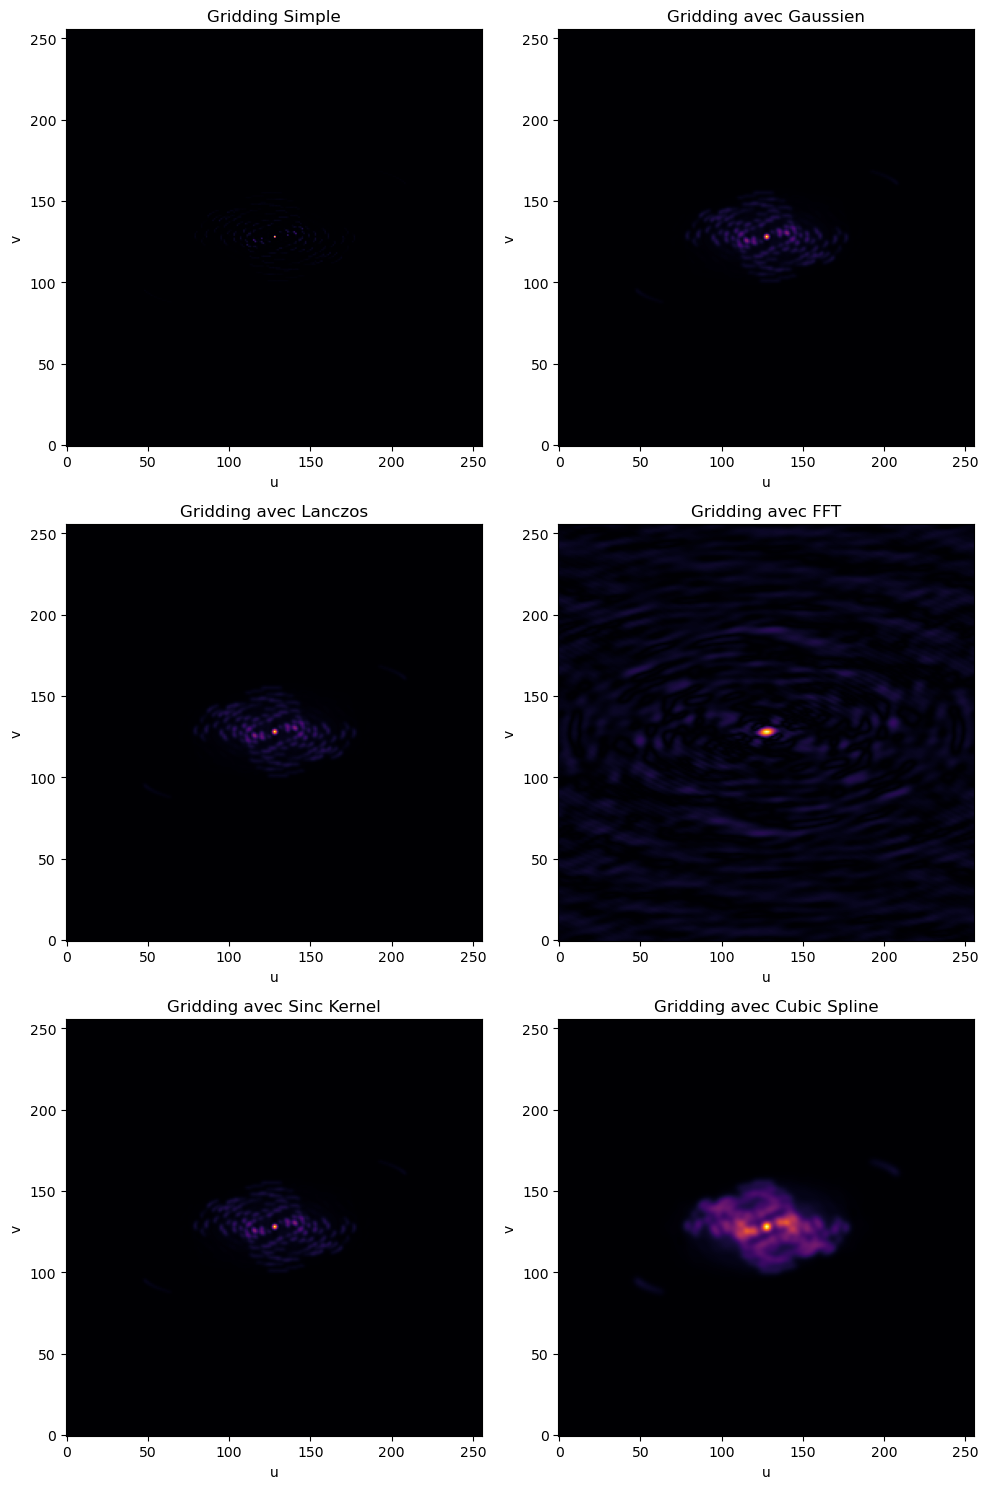

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from casacore.tables import table
from scipy.ndimage import gaussian_filter

# === Chargement du fichier MS ===
ms_path = '/home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS'
t = table(ms_path)
uvw = t.getcol('UVW')  # shape: (3, N)
data = t.getcol('DATA')  # shape: (N, 1, 1)
t.close()

# === Extraction des données ===
u = uvw[:, 0]
v = uvw[:, 1]
vis = data[:, 0, 0].flatten()  # Assurez-vous que vis est un tableau 1D
print(f"u shape: {u.shape}, v shape: {v.shape}, vis shape: {vis.shape}")

# === Paramètres de la grille ===
grid_size = 256  # Taille de la grille
uv_max = np.max(np.abs(np.concatenate([u, v])))  # Plage maximale des coordonnées UV
du = 2 * uv_max / grid_size  # Taille d’un pixel en uv

# === Calcul des indices ===
u_idx = ((u + uv_max) / du).astype(int)  # Conversion des coordonnées UV en indices de grille
v_idx = ((v + uv_max) / du).astype(int)


# === Filtrage des indices valides ===
valid = (u_idx >= 0) & (u_idx < grid_size) & (v_idx >= 0) & (v_idx < grid_size)

# === Sélection des données valides ===
u_idx = u_idx[valid]
v_idx = v_idx[valid]
vis = vis[:len(u_idx)]  # Limite vis à la taille de u_idx


# === Vérification ===
print(f"u_idx après valid: {u_idx.shape}")
print(f"v_idx après valid: {v_idx.shape}")
print(f"vis après valid: {vis.shape}")

# Ajout des visibilités conjuguées pour symétriser le plan UV
u_idx_sym = grid_size - u_idx
v_idx_sym = grid_size - v_idx
vis_sym = np.conj(vis)

# On concatène les originaux + conjugués
u_idx = np.concatenate([u_idx, u_idx_sym])
v_idx = np.concatenate([v_idx, v_idx_sym])
vis = np.concatenate([vis, vis_sym])

# --- 1. Gridding simple (binning direct) ---
grid_simple = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_simple[v_idx[i], u_idx[i]] += vis[i]

# --- 2. Gridding avec kernel gaussien ---
grid_gaussian = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_gaussian[v_idx[i], u_idx[i]] += vis[i]
grid_gaussian_smoothed = gaussian_filter(np.abs(grid_gaussian), sigma=1.0)

# --- 3. Gridding avec un filtre personnalisé (par exemple, Lanczos) ---
def lanczos_kernel(x, a=3):
    """Kernel Lanczos pour interpolation"""
    sinc = np.sinc(x)
    return sinc * np.sinc(x / a)

grid_lanczos = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_lanczos[v_idx[i], u_idx[i]] += vis[i]
grid_lanczos_smoothed = gaussian_filter(np.abs(grid_lanczos), sigma=1.0)  # Simple pour illustration

# --- 4. Gridding avec FFT ---
# Transformation de Fourier directe pour reconstruction de l'image
grid_fft = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_fft[v_idx[i], u_idx[i]] += vis[i]

image_fft = np.abs(np.fft.ifftshift(np.fft.ifft2(np.fft.fftshift(grid_fft))))

# === Gridding avec kernel sinc ===
def sinc_kernel(x, width=3):
    """ Fonction de sinc pour interpolation """
    return np.sinc(x / width)

grid_sinc = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_sinc[v_idx[i], u_idx[i]] += vis[i]
grid_sinc = gaussian_filter(np.abs(grid_sinc), sigma=1.0)  # Lissage

# === Gridding avec Cubic Spline ===
def cubic_spline_interpolation(x):
    """ Fonction de cubic spline pour interpolation """
    return np.interp(x, np.arange(grid_size), np.arange(grid_size))  # Exemples basiques

grid_spline = np.zeros((grid_size, grid_size), dtype=complex)
for i in range(len(u_idx)):
    grid_spline[v_idx[i], u_idx[i]] += vis[i]
grid_spline = gaussian_filter(np.abs(grid_spline), sigma=2.0)  # Lissage léger


# --- Affichage des résultats ---
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
cmap = 'inferno'

# Gridding simple
axes[0, 0].imshow(np.abs(grid_simple), cmap=cmap, origin='lower', aspect='auto')
axes[0, 0].set_title("Gridding Simple")
axes[0, 0].set_xlabel('u')
axes[0, 0].set_ylabel('v')

# Gridding avec kernel gaussien
axes[0, 1].imshow(grid_gaussian_smoothed, cmap=cmap, origin='lower', aspect='auto')
axes[0, 1].set_title("Gridding avec Gaussien")
axes[0, 1].set_xlabel('u')
axes[0, 1].set_ylabel('v')

# Gridding avec Lanczos
axes[1, 0].imshow(grid_lanczos_smoothed, cmap=cmap, origin='lower', aspect='auto')
axes[1, 0].set_title("Gridding avec Lanczos")
axes[1, 0].set_xlabel('u')
axes[1, 0].set_ylabel('v')

# Gridding avec FFT
axes[1, 1].imshow(image_fft.T, cmap=cmap, origin='lower', aspect='auto')
axes[1, 1].set_title("Gridding avec FFT")
axes[1, 1].set_xlabel('u')
axes[1, 1].set_ylabel('v')

# Sinc Kernel
axes[2, 0].imshow(np.abs(grid_sinc), cmap=cmap, origin='lower', aspect='auto')
axes[2, 0].set_title("Gridding avec Sinc Kernel")
axes[2, 0].set_xlabel('u')
axes[2, 0].set_ylabel('v')

# Cubic Spline Interpolation
axes[2, 1].imshow(np.abs(grid_spline), cmap=cmap, origin='lower', aspect='auto')
axes[2, 1].set_title("Gridding avec Cubic Spline")
axes[2, 1].set_xlabel('u')
axes[2, 1].set_ylabel('v')

plt.tight_layout()
plt.show()


✅ Successfully converted to code_dft_ms/data/fits/cycle_4_model.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_1_dirty_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_4_deconvolved.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_3_clean_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_3_dirty_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_0_residual_image.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_1_clean_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_2_dirty_psf.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_1_deconvolved.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_2_residual_image.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_1_residual_image.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_4_residual_image.fits
✅ Successfully converted to code_dft_ms/data/fits/cycle_3_deconvolved.fits
✅ Successfully converted to c

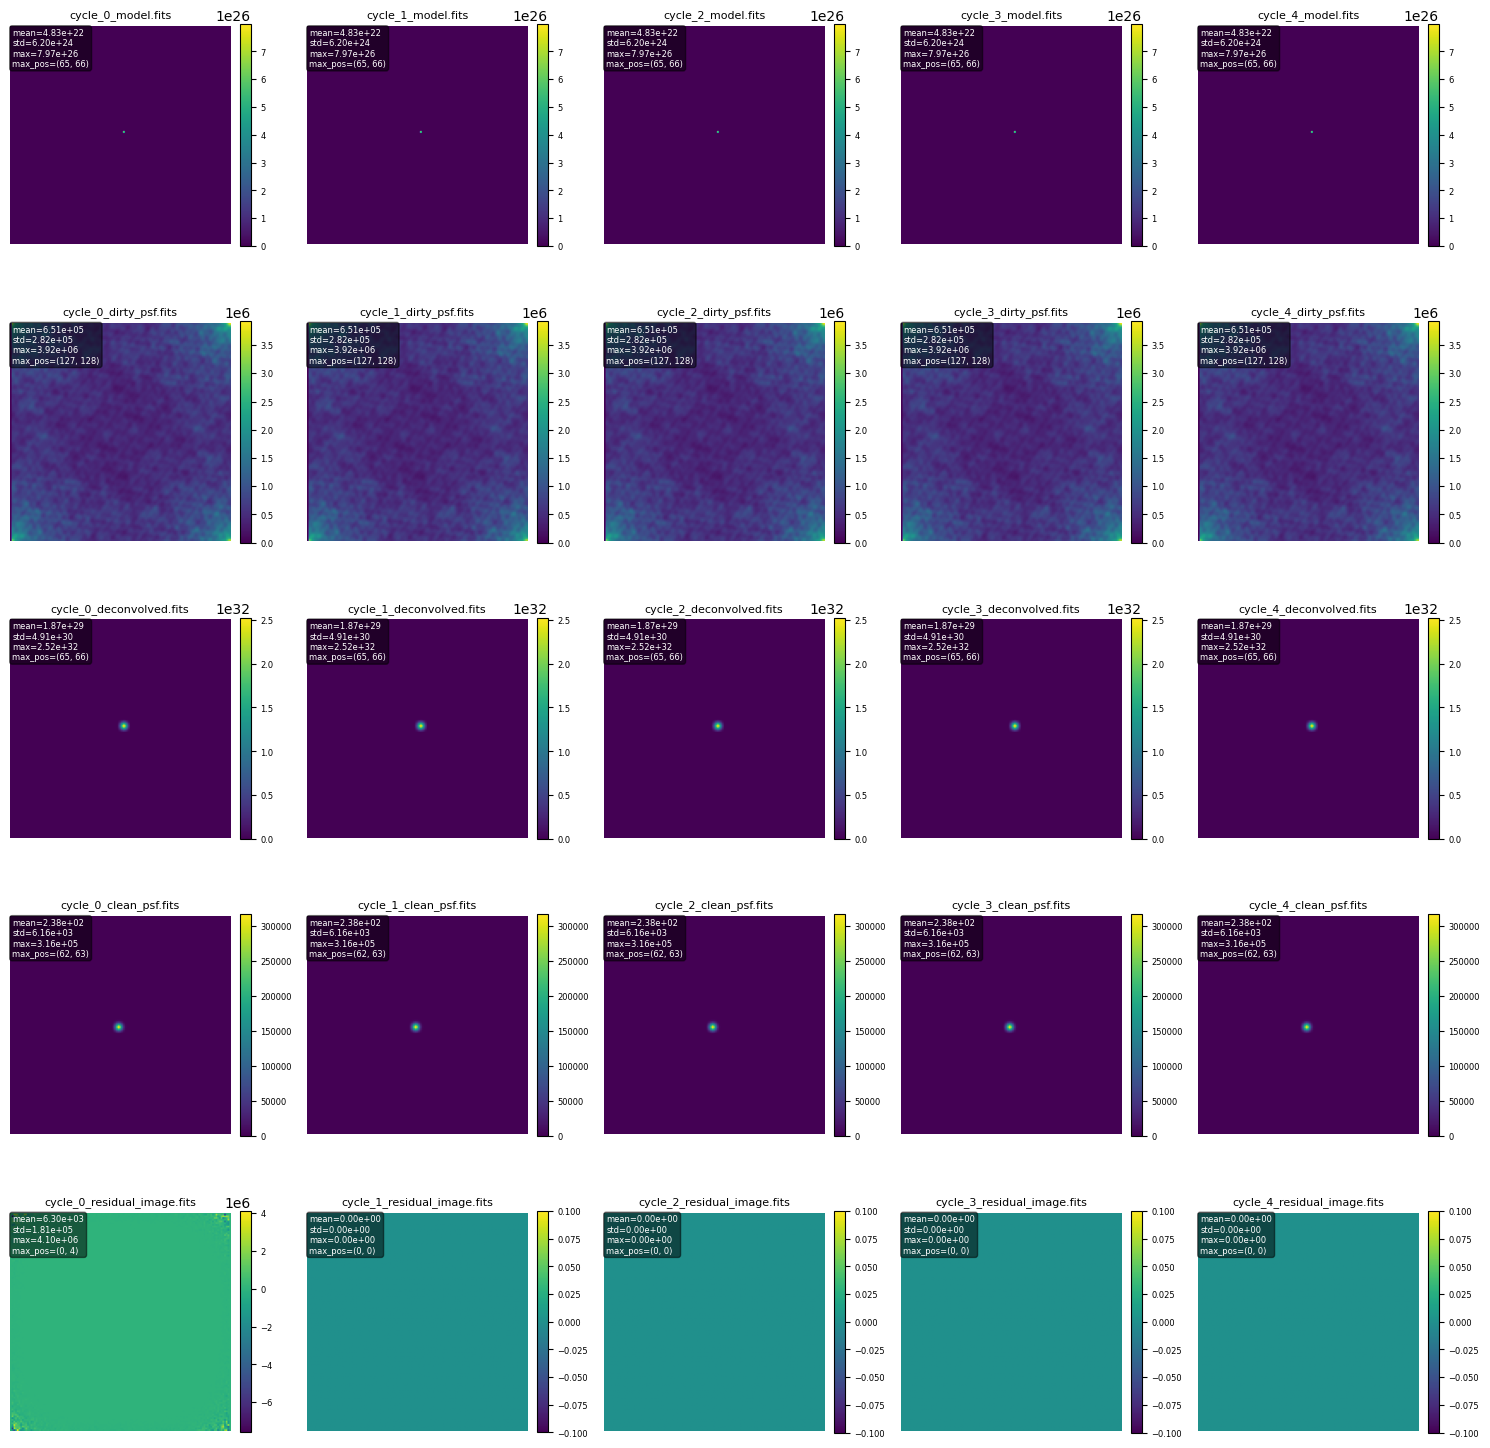

In [27]:
from script.csv_to_fits import *

input_directory = "code_dft_ms/data/output/tune/"
output_directory = "code_dft_ms/data/fits/"
delimiter = ","
convert_all_csv_in_directory(input_directory, output_directory, delimiter)

from script.plot_im import *

base_dir = 'code_dft_ms/data/fits'
types = ['model', 'dirty_psf', 'deconvolved', 'clean_psf', 'residual_image']

display_images_by_type(base_dir, types)

In [15]:
from casacore.tables import table

spw = table("sim_small.ms/SPECTRAL_WINDOW")
chan_freq = spw.getcol("CHAN_FREQ")
bandwidth = spw.getcol("TOTAL_BANDWIDTH")
chan_width = spw.getcol("CHAN_WIDTH")
num_chan = spw.getcol("NUM_CHAN")
uvw = t.getcol('UVW')  # shape: (3, N)


print(f"📡 Observed frequency: {chan_freq[0][0]/1e6} MHz")
print(f"🔈 Total bandwidth: {bandwidth[0]/1e6} MHz")
print(f"🔍 Channel width: {chan_width[0][0]/1e6} MHz")
print(f"🔢 Number of channels: {num_chan[0]}")

ms = table("sim_small.ms")
if uvw.shape[0] == 3:
    uvw = uvw.T  # devient (N, 3)


print("\n🌌 Coordonnées UVW (en mètres) pour les premières visibilités :\n")
for i in range(5):
    u, v, w = uvw[i]
    print(f"Visibilité {i:2d} : u = {u:.2f} m, v = {v:.2f} m, w = {w:.2f} m")
u_vals, v_vals, w_vals = uvw[:, 0], uvw[:, 1], uvw[:, 2]
print("\n📈 Distribution UVW :")
print(f"u : min = {u_vals.min():.2f} m, max = {u_vals.max():.2f} m")
print(f"v : min = {v_vals.min():.2f} m, max = {v_vals.max():.2f} m")
print(f"w : min = {w_vals.min():.2f} m, max = {w_vals.max():.2f} m")


Successful readonly open of default-locked table sim_small.ms/SPECTRAL_WINDOW: 14 columns, 1 rows
📡 Observed frequency: 140.0 MHz
🔈 Total bandwidth: 1.0 MHz
🔍 Channel width: 1.0 MHz
🔢 Number of channels: 1
Successful readonly open of default-locked table sim_small.ms: 22 columns, 3924480 rows

🌌 Coordonnées UVW (en mètres) pour les premières visibilités :

Visibilité  0 : u = -186.48 m, v = 247.99 m, w = -17.40 m
Visibilité  1 : u = -48.28 m, v = 98.56 m, w = -6.41 m
Visibilité  2 : u = -258.76 m, v = 100.70 m, w = -10.67 m
Visibilité  3 : u = -92.97 m, v = 168.97 m, w = -11.18 m
Visibilité  4 : u = -148.83 m, v = 342.73 m, w = -21.91 m

📈 Distribution UVW :
u : min = -64736.81 m, max = 38246.02 m
v : min = -48833.69 m, max = 58840.79 m
w : min = -3791.10 m, max = 4058.78 m


In [4]:
from casacore.tables import table

spw = table("sim_small.ms/SPECTRAL_WINDOW")
chan_freq = spw.getcol("CHAN_FREQ")
bandwidth = spw.getcol("TOTAL_BANDWIDTH")
chan_width = spw.getcol("CHAN_WIDTH")
num_chan = spw.getcol("NUM_CHAN")
uvw = t.getcol('UVW')  # shape: (3, N)


print(f"📡 Observed frequency: {chan_freq[0][0]/1e6} MHz")
print(f"🔈 Total bandwidth: {bandwidth[0]/1e6} MHz")
print(f"🔍 Channel width: {chan_width[0][0]/1e6} MHz")
print(f"🔢 Number of channels: {num_chan[0]}")

ms = table("/home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS")
if uvw.shape[0] == 3:
    uvw = uvw.T  # devient (N, 3)


print("\n🌌 Coordonnées UVW (en mètres) pour les premières visibilités :\n")
for i in range(5):
    u, v, w = uvw[i]
    print(f"Visibilité {i:2d} : u = {u:.2f} m, v = {v:.2f} m, w = {w:.2f} m")
u_vals, v_vals, w_vals = uvw[:, 0], uvw[:, 1], uvw[:, 2]
print("\n📈 Distribution UVW :")
print(f"u : min = {u_vals.min():.2f} m, max = {u_vals.max():.2f} m")
print(f"v : min = {v_vals.min():.2f} m, max = {v_vals.max():.2f} m")
print(f"w : min = {w_vals.min():.2f} m, max = {w_vals.max():.2f} m")


Successful readonly open of default-locked table sim_small.ms/SPECTRAL_WINDOW: 14 columns, 1 rows


NameError: name 't' is not defined

In [2]:
import os
import shutil
from casacore.tables import table, taql

def split_ms_for_parallel(ms_path, output_dir, num_nodes):
    """
    Split a MeasurementSet for distribution across multiple nodes.

    Args:
        ms_path (str): Path to the input MeasurementSet.
        output_dir (str): Directory where splitted MSs will be stored.
        num_nodes (int): Number of nodes to split into.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Open the main table
    ms = table(ms_path)
    nrows = ms.nrows()
    print(f"Total number of rows: {nrows}")

    rows_per_node = nrows // num_nodes
    print(f"Rows per node: {rows_per_node}")

    for node in range(num_nodes):
        start_row = node * rows_per_node
        if node == num_nodes - 1:
            end_row = nrows  # last node takes everything remaining
        else:
            end_row = (node + 1) * rows_per_node
        
        output_ms = os.path.join(output_dir, f"part{node}.ms")
        
        print(f"Creating {output_ms} with rows {start_row} to {end_row-1}")

        # Use TAQL to select a subset
        taql(f"select from {ms_path} where $row >= {start_row} and $row < {end_row} giving {output_ms}")

    print("Splitting done.")

if __name__ == "__main__":
    # Example usage
    ms_input="/home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS"
   # ms_input = "sim_small.ms"       # <- Chemin de ton MeasurementSet
    output_directory = "splitted_ms"  # <- Dossier où seront créés les MS partiels
    number_of_nodes = 4           # <- Nombre de nœuds sur lesquels tu veux distribuer

    split_ms_for_parallel(ms_input, output_directory, number_of_nodes)


Successful readonly open of default-locked table /home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS: 26 columns, 1477782 rows
Total number of rows: 1477782
Rows per node: 369445
Creating splitted_ms/part0.ms with rows 0 to 369444


RuntimeError: Error in TaQL command: using style Python select from /home/orenaud/Desktop/nancep/VirA-SB155/SB155.rebin.MS where $row >= 0 and $row < 369445 giving splitted_ms/part0.ms
  parse error at or near position 92 '$'